# Red Wine Clustering

The goal of the Red Wine Clustering project is to analyze a dataset of red wine samples and identify distinct groups or clusters based on their chemical properties. The project aims to uncover patterns and relationships within the data that can provide insights into the characteristics and qualities of different types of red wines.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
dataframe = pd.read_csv('winequality-red.csv')

# Exploratory Data Analysis

The process of analyzing and understanding a dataset to gain insights and identify patterns or trends. The goal of exploring the data is to become familiar with its structure, distribution, and quality, as well as to identify potential issues or anomalies that may need to be addressed before further analysis.

In [4]:
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dataframe.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
dataframe.shape

(1599, 12)

In [8]:
dataframe.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Statical Info

Statistical information provides a summary and description of data using various statistical measures. It helps in understanding the distribution, central tendency, variability, and relationships within a dataset.

In [9]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [12]:
corr_matrix = dataframe.corr()

In [13]:
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

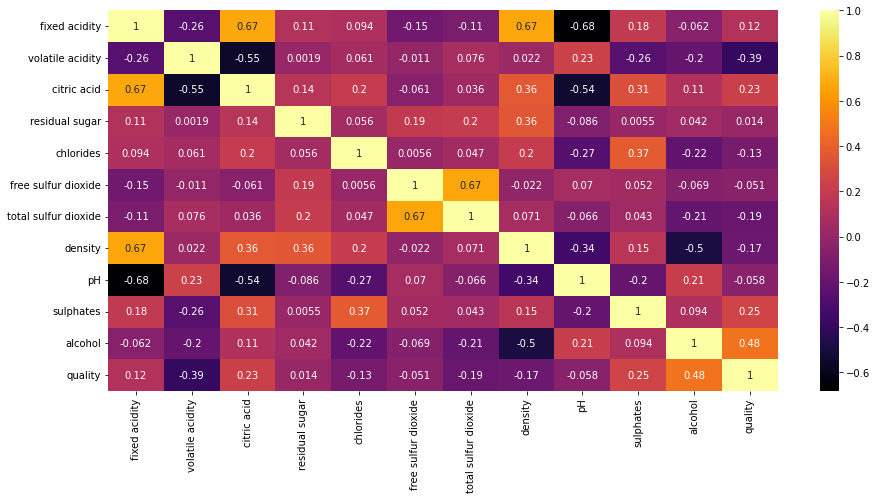

In [15]:
plt.figure(figsize = (15, 7))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'inferno')

# Correlation of Wine Quality with Different Attriutes 

In [16]:
dataframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
dataset = dataframe.drop('quality', axis = 1)

In [18]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


<AxesSubplot:title={'center':'Correlation with Quality'}>

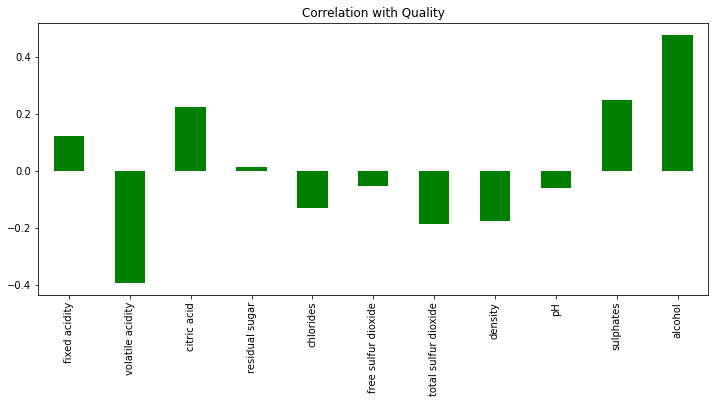

In [20]:
dataset.corrwith(dataframe['quality']).plot.bar(
    figsize = (12, 5), 
    title = 'Correlation with Quality', 
    rot = 90, 
    cmap = 'ocean'
)

In [21]:
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Scaling

Scaling refers to the process of transforming numerical variables in a dataset to a specific range or distribution. It is often performed as a preprocessing step before applying machine learning algorithms or statistical analysis. 

Standard scaling, also known as feature scaling or standardization, is a common data preprocessing technique used in machine learning and data analysis. It involves transforming numerical features in a dataset to have a mean of zero and a standard deviation of one

Mathematically, the standard scaling formula for a feature x is:

x_scaled = (x - μ) / σ

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
wine_data = dataframe.copy()

In [26]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
wine_data = scaler.fit_transform(wine_data)

In [30]:
wine_data

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

# KMeans

K-means is a popular clustering algorithm used to partition data points into K distinct clusters based on their features. The algorithm aims to minimize the within-cluster sum of squares (WCSS) by iteratively assigning data points to clusters and updating the cluster centroids.

In [31]:
from sklearn.cluster import KMeans

In [32]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(wine_data)
    wcss.append(kmeans.inertia_)

# Clustering Dataset

Clustering is a data analysis technique that involves grouping similar data points together based on their inherent characteristics or patterns. The goal of clustering is to discover natural groupings within the data without any prior knowledge of the group labels. It is an unsupervised learning technique as it does not rely on labeled data.

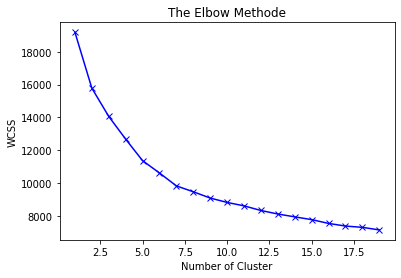

In [33]:
plt.plot(range(1, 20), wcss, 'bx-')
plt.title('The Elbow Methode')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 0)

In [35]:
y_kmeans = kmeans.fit_predict(dataset)

In [36]:
y_kmeans = y_kmeans.reshape(len(y_kmeans), 1)

In [37]:
ab = np.concatenate((y_kmeans, dataframe), axis = 1)

In [39]:
dataframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Clustered Dataframe

In [41]:
cluster_dataframe = pd.DataFrame(data = ab, columns =  ['Cluster Number', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])

In [42]:
cluster_dataframe.head()

,Cluster Number,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,6.0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,6.0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,1.0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [43]:
cluster_dataframe.to_csv('Cluster_Red_Wine')

# Thanks !